**Q2 PART 1**

In [1]:
#importing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Please copy the 'cleveland_heart_attr.csv' and 'cleveland_heart_attr_description.txt' files to the current folder in colab
#read the csv file into a dataframe
df = pd.read_csv('cleveland_heart_attr.csv')

In [8]:
#check the data frame by printing its first (five) few rows
df.head()

,age,sex,chest_pain_type,rest_bp,serum_cholesterol,fastblood_sugar,rest_ecg,max_heartrate,exercise_angina,ST_depression_exercise_relativeto_rest,slope_peak_STsegment,num_major_vessels_fluroscopy,thal,heart_disease_status
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [9]:
data_description = open('cleveland_heart_attr_description.txt','r').read()
print(data_description)

Publication Request: 
   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
   This file describes the contents of the heart-disease directory.

   This directory contains 1 database concerning heart disease diagnosis.
   All attributes are numeric-valued.  The data was collected from the
    following location:

     1. Cleveland Clinic Foundation (cleveland.data)

While the database contains 76 attributes, only  14 attributes were actually used in past experiments. 

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

1. Title: Heart Disease Databases

2. Source Information:
   (a) Creators: 
       -- 1. Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
   (b) Donor: David W. Aha (aha@ics.uci.edu) (714) 856-8779   
   (c) Date: July, 1988


3. Relevant Information:
     This database contains 76 attributes, but all published experiments
     refer to using a subset of 14 of them.  In particular, the Cleveland
     database is th

In [4]:
#Printing number of rows in df
(len(df.index))

303

In [5]:
#Printing the columns in df
(df.columns)

Index(['age', 'sex', 'chest_pain_type', 'rest_bp', 'serum_cholesterol',
       'fastblood_sugar', 'rest_ecg', 'max_heartrate', 'exercise_angina',
       'ST_depression_exercise_relativeto_rest', 'slope_peak_STsegment',
       'num_major_vessels_fluroscopy', 'thal', 'heart_disease_status'],
      dtype='object')

**Q2 Part 2**

Why are the num major vessels fluroscopy and thal columns considered object types? Write the
reason

In [6]:
#for categorical variables we can use the following
df['num_major_vessels_fluroscopy'].unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [ ]:
df['thal'].unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

They both have '?' as a value that's why they are object data type because mixed data types are present.

**Q2 Part 3**

Bin Size: 4.8


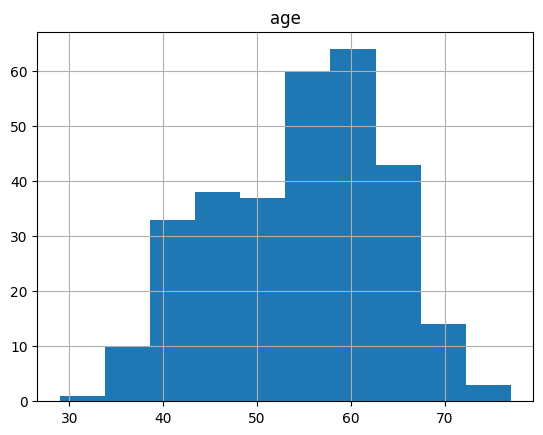

In [10]:
#Let us try to understand the age distribution of the patients in the data
#For this we will use a simple histogram. We will use pandas' hist() utility

df.hist(column='age')
#[R] From the histogram identify the number of bins and bin size. Report these quantities.

# Assuming 'df' is your DataFrame and 'column_name' is the column for which you want to calculate bin sizes
data = df['age']
num_bins = 10  # Number of bins (you can use Sturges' formula or other methods to estimate an optimal number of bins)

data_range = data.max() - data.min()
bin_size = data_range / num_bins
print("Bin Size:", bin_size)

Bin size is approximately 5, and total bins are 10 which is default

**Q2 Part 4**\
Plot the histogram on age attribute for 50 bins and report the bin size and your observations.

Bin Size: 0.96


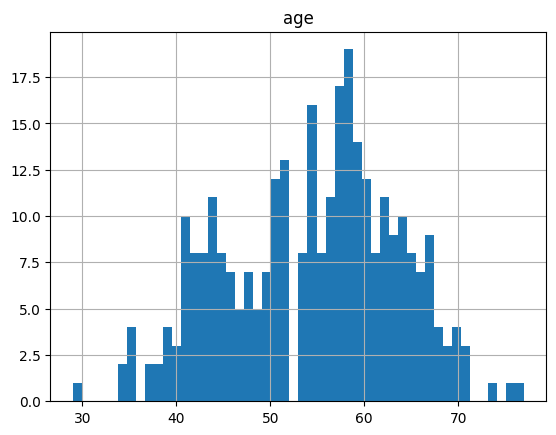

In [12]:
#We can adjust the bin size and replot the histogram
df.hist(column='age',bins=50)
#What is the bin size in this case?
#almost 2.5
data_range = data.max() - data.min()
bin_size = data_range / 50
print("Bin Size:", bin_size)

Bin size is almost 1 and total bins are 50

<Axes: xlabel='age', ylabel='Count'>

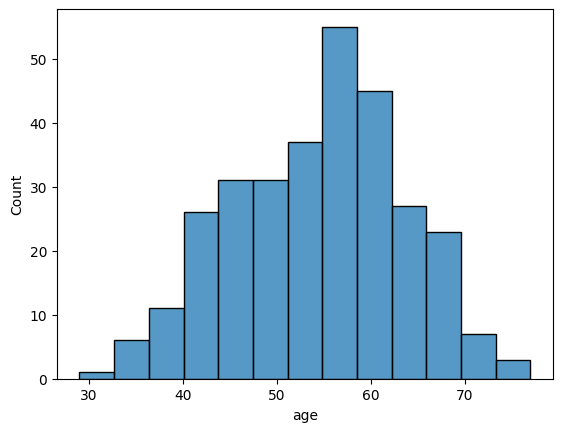

In [14]:
#seaborn has its own histogram plotting utility
sns.histplot(df.age)

<Axes: xlabel='age', ylabel='Count'>

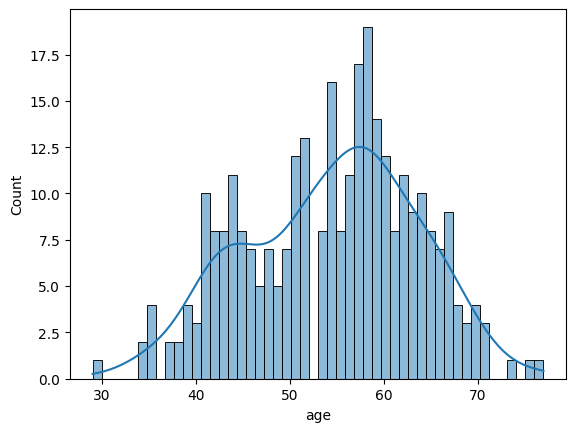

In [15]:
#Replotting the distribution for 50 bins
sns.histplot(df.age,bins=50,kde=True)

**Q2 Part 5**\
What is the KDE option useful for in histplot()? Explain the details.\

Kernel Density Estimation (KDE) is a non-parametric method used to estimate the probability
 density function of a random variable based on a given dataset. It's a technique used for
 visualizing and estimating the underlying distribution of data in a continuous domain. It gives us an approximate continuous distribution of the data, by using gaussian filter (default) at each data point.

**Q2 Part 6**\
Plot pandas based histogram and seaborn based histogram for serum cholesterol at tribute. Use bin
sizes from {default, 20, 50, 100, 200, 500}. For seaborn, use KDE. Report the observations.

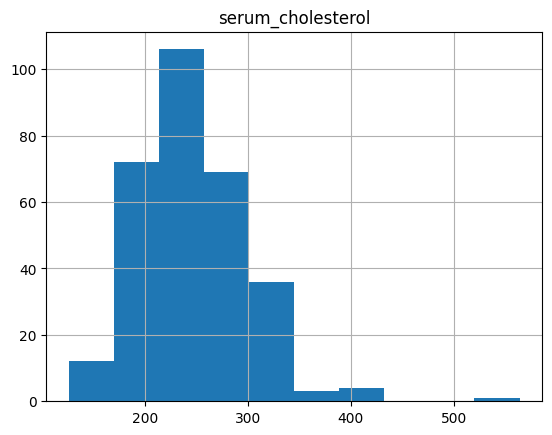

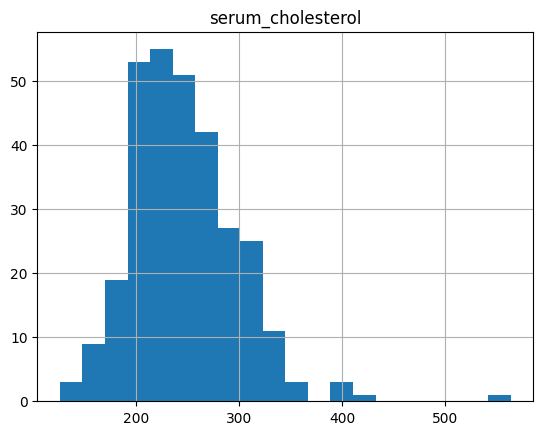

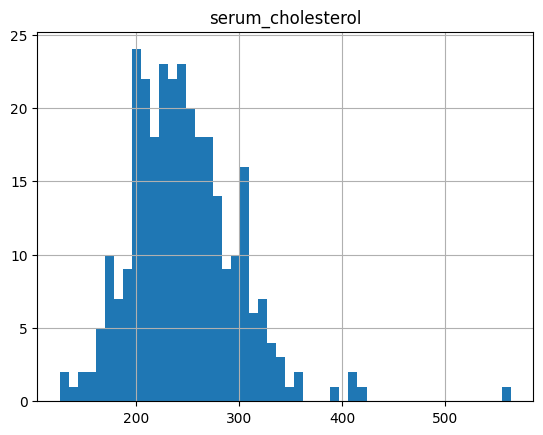

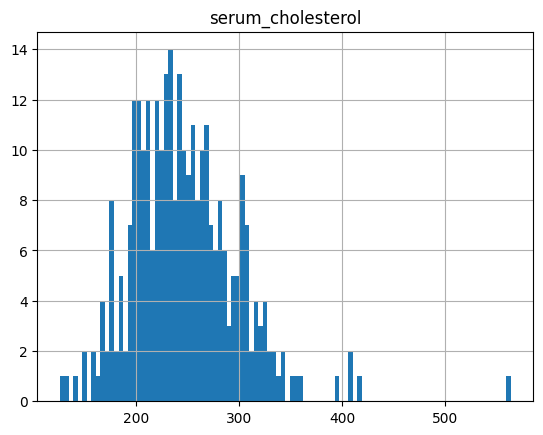

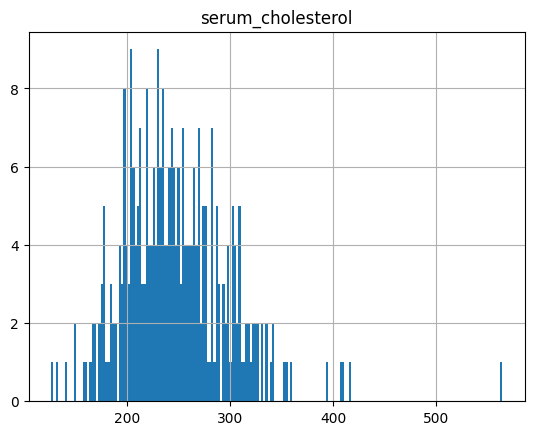

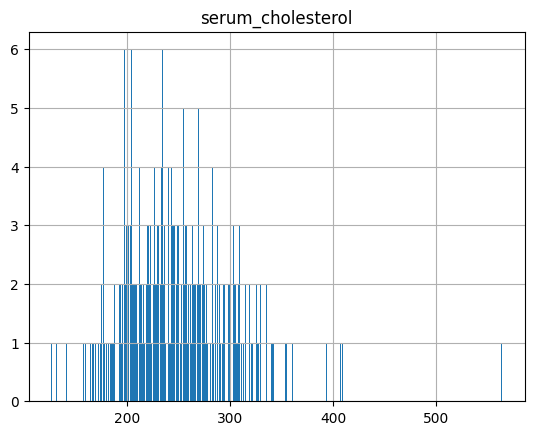

In [16]:
bin_sizes = [20, 50, 100, 200, 500]
import matplotlib.pyplot as plt
#default
df.hist(column = 'serum_cholesterol')
for bin_size in bin_sizes:
  df.hist('serum_cholesterol', bins = bin_size)

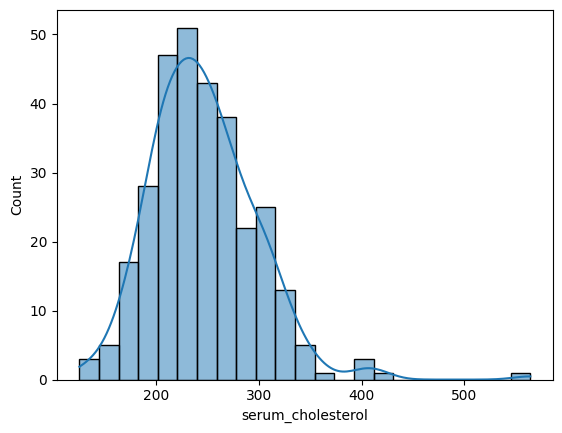

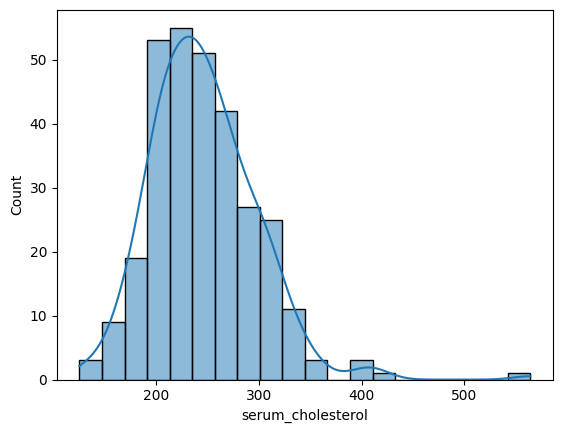

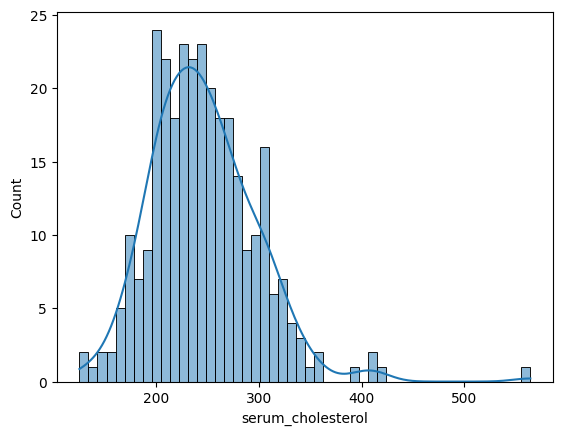

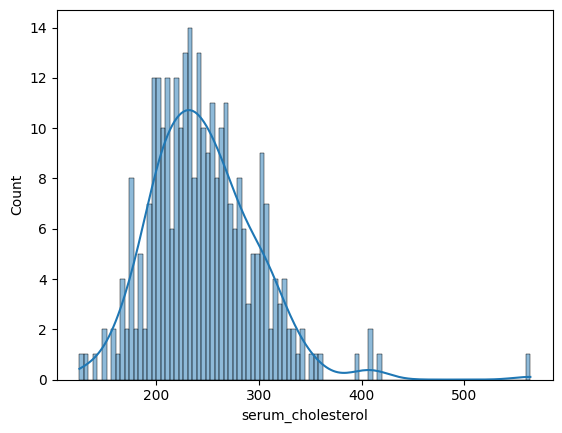

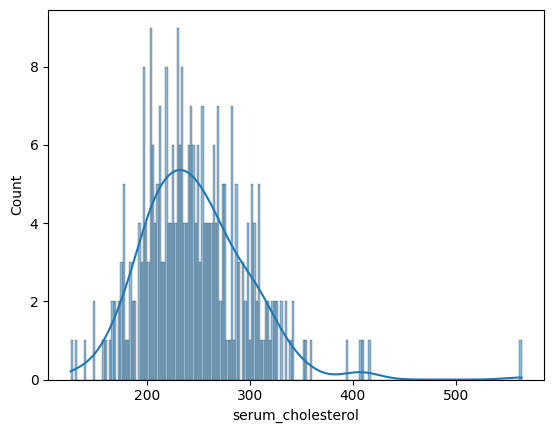

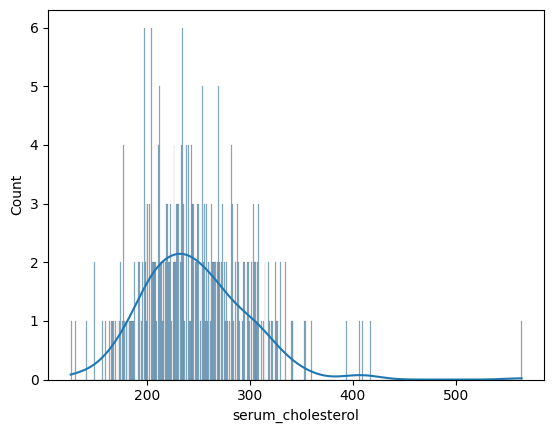

In [17]:
bin_sizes = [20, 50, 100, 200, 500]
import matplotlib.pyplot as plt
#default
sns.histplot(df['serum_cholesterol'], kde = True)
plt.show()
for bin_size in bin_sizes:
  sns.histplot(df['serum_cholesterol'], kde = True, bins = bin_size)
  plt.show()

Observations: The "default" bins sets the number of bins automatically which is 10.
Smaller bins (e.g., 20) provide a more general overview but might mask smaller details while Large number of bins (e.g., 500)  offer more detailed views but can introduce more noise.
You might observe different patterns in the data distribution with varying bin sizes, affecting the interpretation of the serum_cholesterol attribute's distribution. \


---


Seaborn's histplot(): \
**KDE Option**: Seaborn's histplot() provides an option for Kernel Density Estimation (KDE) using the kde parameter, allowing simultaneous visualization of a KDE plot with the histogram. This provides a smoothed representation of the data's underlying distribution.\
**Aesthetic Control**: Seaborn offers a more visually appealing default style, with better control over aesthetic elements like colors, styles, and additional parameters to enhance the plot's appearance.

---
Pandas' hist():

**Simplicity and Quick Visualization**:
Pandas' hist() is part of the Pandas library and offers a straightforward way to create histograms directly from DataFrame columns without the need to import additional libraries.\
**Basic Functionality**:
It provides a basic and quick way to generate histograms, offering limited customization options directly from the DataFrame.\
**Simple Usage:**
The hist() method is user-friendly for quick exploratory data analysis directly within Pandas.

**Q2 Part 7**\
In the plot depicting the histogram of serum cholesterol attribute containing mean and median, add
also the vertical lines to represent the 25 percentile and 75 percentile values in the serum cholesterol
attribute. Use different colors and appropriate legend.

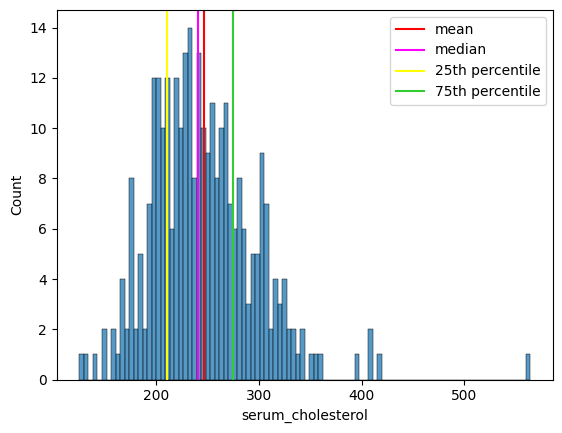

In [19]:
#[R] Add to the above plot containing mean and median, the vertical lines to represent the 25 percentile and 75 percentile values in the serum_cholesterol attribute. Use different colors and appropriate legend.

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming 'df' is your DataFrame and 'serum_cholesterol' is a column in it

# Create the initial histogram with mean and median lines
sns.histplot(df.serum_cholesterol, bins=100)
plt.axvline(x=np.mean(df.serum_cholesterol), color='red', label='mean')
plt.axvline(x=np.median(df.serum_cholesterol), color='magenta', label='median')

# Calculate the 25th and 75th percentiles
percentile_25 = np.percentile(df.serum_cholesterol, 25)
percentile_75 = np.percentile(df.serum_cholesterol, 75)

# Add lines for the 25th and 75th percentiles
plt.axvline(x=percentile_25, color='yellow', label='25th percentile')
plt.axvline(x=percentile_75, color='limegreen', label='75th percentile')

# Display the legend at an appropriate location
plt.legend(loc='upper right')

# Show the plot
plt.show()

**Q2 Part 8**\
Change the order in the bar plots for gender vs serum cholesterol from male, female to female, male
and replot.

In [20]:
# Let us use bar plots now to understand about the data description
# To do this let us first introduce new column to the data frame indicating the gender of patient
df['gender'] = np.where(df['sex']==1.0,'male','female')

In [21]:
df.head()
#check the last column

,age,sex,chest_pain_type,rest_bp,serum_cholesterol,fastblood_sugar,rest_ecg,max_heartrate,exercise_angina,ST_depression_exercise_relativeto_rest,slope_peak_STsegment,num_major_vessels_fluroscopy,thal,heart_disease_status,gender
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,male
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,male
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,male
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,male
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,female


239.60194174757282


261.7525773195876

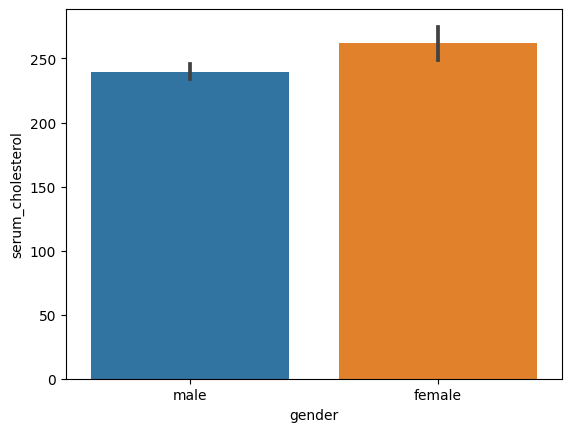

In [22]:
#Let us plot the bar plot for gender vs serum_cholesterol
sns.barplot(x="gender",y="serum_cholesterol",data=df)
#What does the plot describe? What are the vertical bars in each bar?
'''
The plot allows for a visual comparison of average serum cholesterol levels
between different genders, providing insights into any potential differences
or similarities in cholesterol levels across the gender categories. The error
bars help to understand the variability or uncertainty in these average
cholesterol measurements for each gender group.
'''
print(df[df['sex']==1]['serum_cholesterol'].mean())
df[df['sex']==0]['serum_cholesterol'].mean()

<Axes: xlabel='gender', ylabel='serum_cholesterol'>

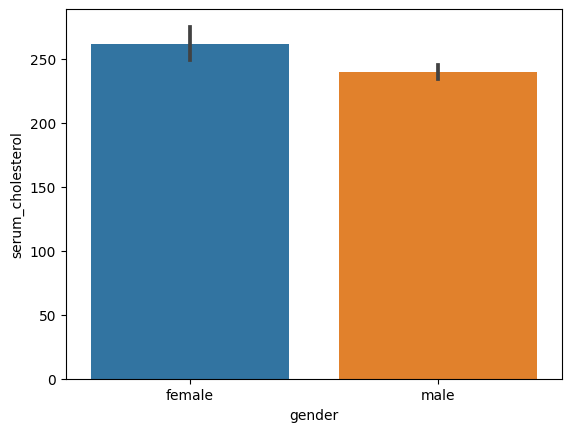

In [23]:
#[R] Change the order in the bar plots from male, female to female, male
sns.barplot(x="gender",y="serum_cholesterol",data=df, order = ['female', 'male'])

**Q2 Part 9**

<Axes: xlabel='gender', ylabel='serum_cholesterol'>

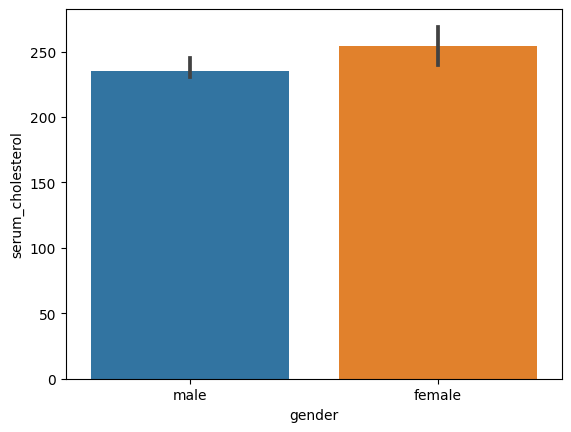

In [24]:
#Let us try the barplot with a different option
sns.barplot(x="gender",y="serum_cholesterol",data=df,estimator=np.median)
#[R} Explain the difference between the plot obtained below using the median estimator and the plot obtained above.


The bar plot generated with the estimator=np.median argument displays the median serum cholesterol levels for each gender category. In this case, each bar's height represents the median serum cholesterol level, offering a different statistical summary compared to the average (mean).The mean reflects the average value, whereas the median represents the middle value in a dataset.
The mean is influenced by extreme values (outliers), while the median is more resistant to extreme values, making it more robust in certain situations. We can see that the mean was greater than 250 in female case whereas median was lower. Whereas for male it almost remains same.

**Q2 Part 10**

Explain the observations from the bar plot containing gender vs serum cholesterol grouped accord-
ing to chest pain type.

<Axes: xlabel='gender', ylabel='serum_cholesterol'>

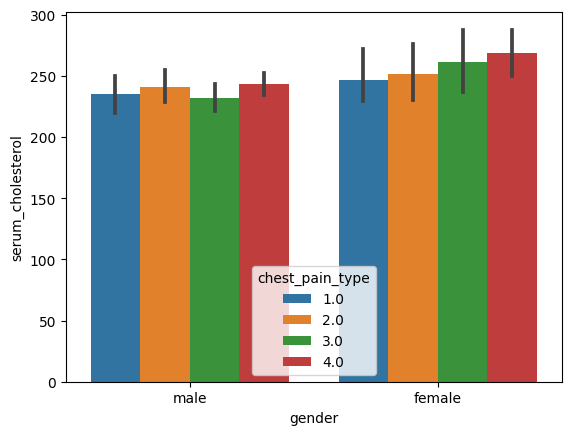

In [ ]:
#We can create bar plots with even more fine-grained grouping
#Let us group according to chest_pain_type
sns.barplot(x="gender",y="serum_cholesterol",hue="chest_pain_type",data=df)
#[R} Explain the observations from the plot.

Observations from the Plot:

The x-axis displays the 'gender' categories (male and female), where bars are grouped for each gender. The y-axis represents the 'serum_cholesterol' levels.
Chest Pain Types as Groupings:

Different hues (colors) within each gender category represent the 'chest_pain_type' subgroups.


**Insights from the Plot:** \
The grouped bars for each gender represent serum cholesterol levels, divided into different chest pain types. This allows for a direct visual comparison of serum cholesterol levels within each gender category. We see that females have generally high serum cholestrol level comapared to males. It is also visible that high cholestrol level directly impacts the chest pain type. Chest pain type 4 have high cholesterol.

**Variations in Serum Cholesterol by Chest Pain Types**:\
Within each gender group, differences in serum cholesterol levels are depicted by the variations in bar heights and colors, representing various chest pain types. We see that in females the cholesterol level increases as the chest pain type increases. But that upward trend is not visible in males, as we see that chest pain type 3 has lower level then chest pain 2.\
But here 1,2,3,4 is not an inherent order in chest pain type as per description its just unordered categorical.

**Q2 Part 11**

Note that the chest pain type attribute is numerical and hence is of less value in the bar plot obtained
for gender vs serum cholesterol grouped according to chest pain type. To make the plot more
meaningful, insert a new column to the dataframe which contains the description according to the
corresponding chest pain type code. Name this column as chest pain type description. To fill the
values in this chest pain type description column, take the description for chest pain type from
description file. Construct the bar plot for gender vs serum cholesterol grouped according to chest
pain type description. Add an appropriate legend and display the legend in a position where the bar
graphs are clearly visible.

In [25]:
#[R] Note that the chest_pain_type is numerical and hence is of less value in the plot above.
# To make the plot more meaningful, insert a new column to the dataframe which contains the description according to the corresponding chest_pain_type code.
# create a list of our conditions
conditions = [
    (df['chest_pain_type'] == 1),
    (df['chest_pain_type'] == 2),
    (df['chest_pain_type']  == 3),
    (df['chest_pain_type'] == 4)
    ]

# create a list of the values we want to assign for each condition
values = ['typical_angina', 'atypical_angina', 'non_anginal_pain', 'asymptomatic']

# Name this column as chest_pain_type_description.
# To fill the values in this chest_pain_type_description column, take the description for chest_pain_type from description file.

# create a new column and use np.select to assign values to it using our lists as arguments
df['chest_pain_type_description'] = np.select(conditions, values)

# display updated DataFrame
df.head()


,age,sex,chest_pain_type,rest_bp,serum_cholesterol,fastblood_sugar,rest_ecg,max_heartrate,exercise_angina,ST_depression_exercise_relativeto_rest,slope_peak_STsegment,num_major_vessels_fluroscopy,thal,heart_disease_status,gender,chest_pain_type_description
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,male,typical_angina
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,male,asymptomatic
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,male,asymptomatic
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,male,non_anginal_pain
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,female,atypical_angina


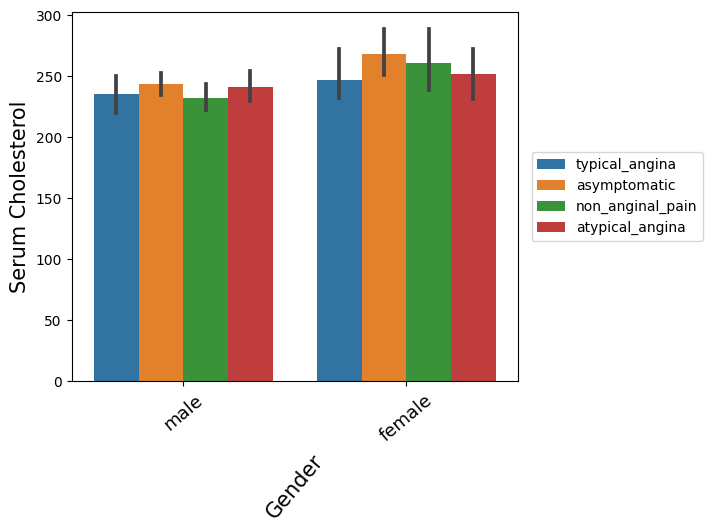

In [26]:
# Construct the above grouped bar plot where the grouping is now with respect to the textual description of the chest_pain_type.
ax = sns.barplot(x="gender",y="serum_cholesterol",hue="chest_pain_type_description",data=df)
ax.legend(loc='upper left', ncol=4)
ax.set_xlabel("Gender",fontsize=15,rotation=50)
ax.set_ylabel("Serum Cholesterol",fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=13,rotation=40)
pos = ax.get_position()
# Add an appropriate legend and display the legend in a position where the bar graphs are clearly visible.
ax.set_position([pos.x0, pos.y0, pos.width * 0.9, pos.height])
ax.legend(loc='center right', bbox_to_anchor=(1.43, 0.5))

**Q2 Part 12**

Text(0.3, 300.8597087378641, 'The average serum cholesterol\n for men is lower!')

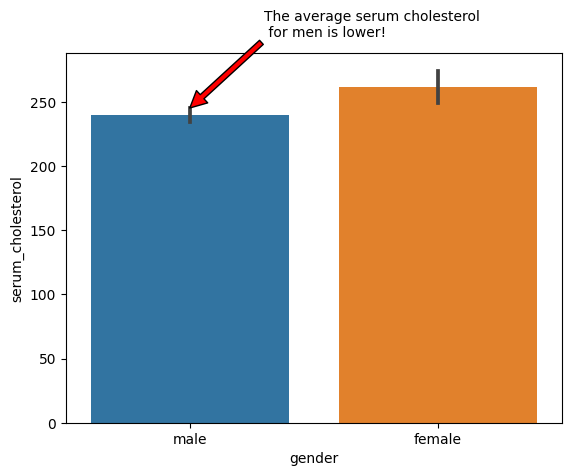

In [27]:
import matplotlib.pyplot as plt
#There are other ways to add annotations to bar plots
#We will consider the bar plot based on gender vs serum_cholesterol
plot = sns.barplot(x="gender",y="serum_cholesterol",data=df)

#plot.patches[0].get_x()

x=plot.patches[0].get_x() + plot.patches[0].get_width() / 2.
y=plot.lines[0].get_ydata()[1]
plt.annotate('The average serum cholesterol\n for men is lower!', xy=(x,y), xytext=(x+0.3,y+55.5), arrowprops=dict(facecolor='red'))

**Q2 Part 13**

Text(1.4000000000000001, 343.1871428571429, 'Average cholesterol is higher than men and also the variability is also higher compared to men!')

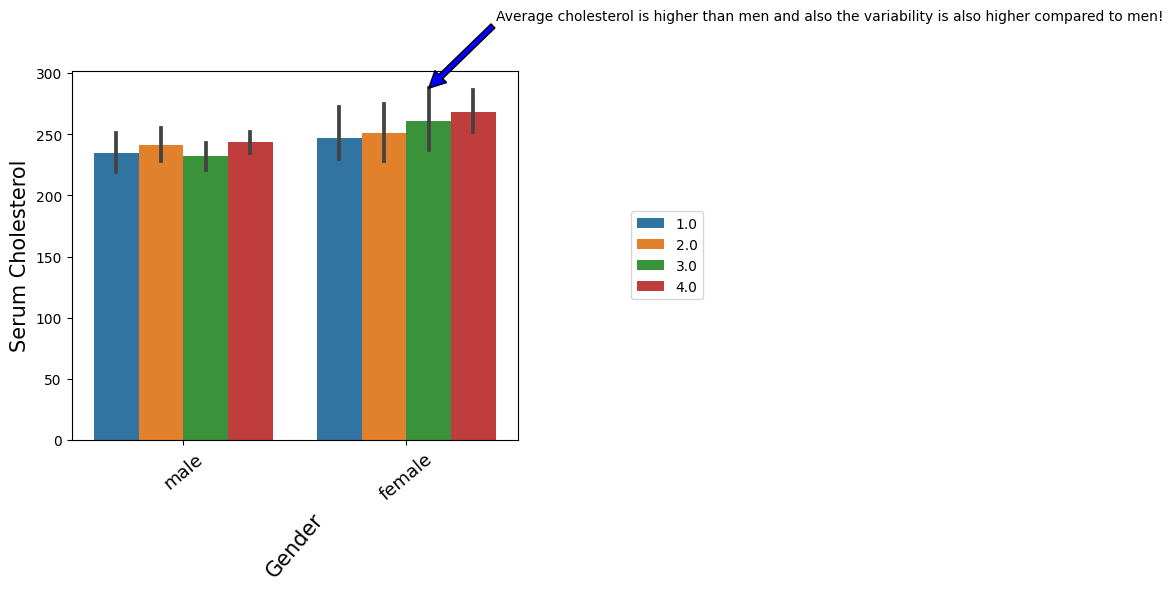

In [28]:
#[R] Add an appropriate annotation with pointed arrows and with textual description in bar plot of gender vs serum_cholesterol bar plot grouped according to chest_pain_type attribute.
# Color the arrow with a color other than red.
# Construct the above grouped bar plot where the grouping is now with respect to the textual description of the chest_pain_type.
ax = sns.barplot(x="gender",y="serum_cholesterol",hue="chest_pain_type",data=df)
ax.legend(loc='upper left', ncol=4)
ax.set_xlabel("Gender",fontsize=15,rotation=50)
ax.set_ylabel("Serum Cholesterol",fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=13,rotation=40)
pos = ax.get_position()
# Add an appropriate legend and display the legend in a position where the bar graphs are clearly visible.
ax.set_position([pos.x0, pos.y0, pos.width * 0.9, pos.height])
ax.legend(loc='center right', bbox_to_anchor=(1.43, 0.5))


# for p,line in zip(ax.patches, ax.lines):
#     ax.annotate(format(p.get_height(),'.1f'),
#                    (p.get_x() + p.get_width() / 2., line.get_ydata()[1]),
#                    ha = 'center', va = 'top',
#                    xytext = (0, 9),
#                    textcoords = 'offset points')


#plot.patches[0].get_x()
# [print(patch) for patch in ax.patches]
# [print(line.get_xdata()) for line in ax.lines]
x=ax.patches[5].get_x() + ax.patches[6].get_width() / 2.
# print(x)
y=ax.lines[5].get_ydata()[1]
ax.annotate('Average cholesterol is higher than men and also the variability is also higher compared to men!', xy=(x,y), xytext=(x+0.3,y+55.5), arrowprops=dict(facecolor='blue'))

**Q2 Part 14**

<Axes: xlabel='age', ylabel='serum_cholesterol'>

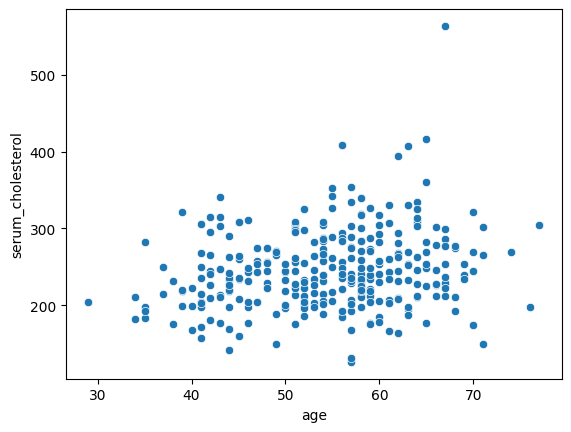

In [29]:
#To capture whether two attributes are correlated, one way is to use scatter plot
#Let us try to see if age is related to serum_cholesterol

sns.scatterplot(x="age",y="serum_cholesterol",data=df)
#[R] Explain your observations from the scatter plot.

There is not much of a trend in age vs serum cholesterol level as I can see from the graph. It's just that there is more data from ages 45 to 65 in serum cholesterol and a slight upward trend.

**Q2 Part 15**

<Axes: xlabel='age', ylabel='serum_cholesterol'>

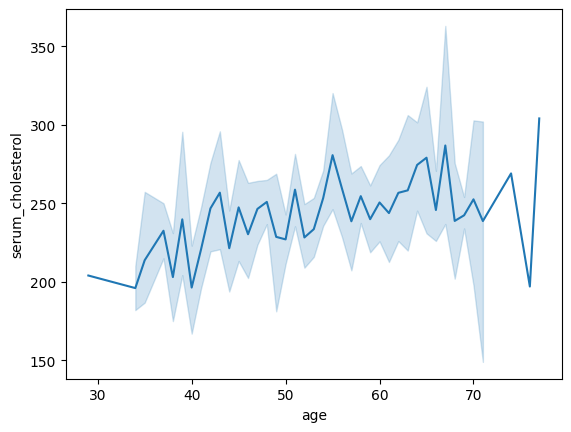

In [30]:
#We can also use lineplot to plot the relationship between variables
sns.lineplot(x="age",y="serum_cholesterol",data=df)

In [ ]:
#[R] What do the light-colored bands and the dark central line indicate in the above line plot?

In a Seaborn line plot, the light-colored bands typically represent confidence intervals around the plotted line, while the dark central line is the actual line indicating the mean or median trend of the data.

These shaded regions surrounding the main line on the plot represent uncertainty or confidence levels. The lighter bands often illustrate a range around the line that is, for instance, one standard deviation or a particular confidence interval (such as 95% confidence interval). The central dark line depicts the central tendency or the mean/median trend of the data.

**Q2 Part 16**

<Axes: xlabel='chest_pain_type', ylabel='serum_cholesterol'>

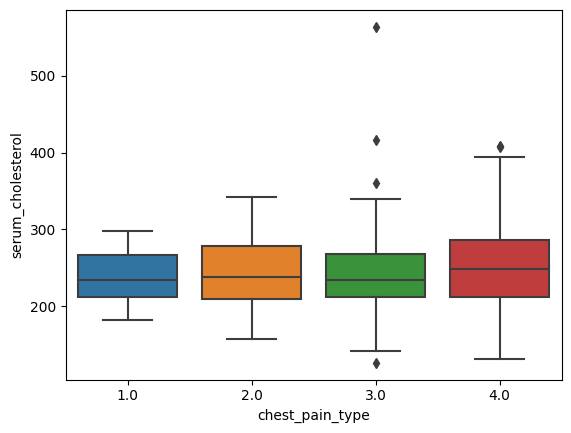

In [31]:
#We can use blox plots which would provide details about summary statistics
sns.boxplot(x="chest_pain_type",y="serum_cholesterol",data=df)


In [ ]:
#[R] What do the upper and lower boundaries of the box indicate? What does the line inside the box indicate? What are the points marked beyond the error bars?  Explain.

Upper and Lower Boundaries of the Box:

The upper and lower boundaries of the box in a boxplot represent the third quartile (Q3) and the first quartile (Q1), respectively. These quartiles divide the data into quarters, with the box representing the interquartile range (IQR), which is the middle 50% of the data. The distance between the upper (Q3) and lower (Q1) boundaries of the box is the IQR.

Line Inside the Box (Median):

The line within the box is the median of the data, also known as the second quartile (Q2). The median is the middle value of the dataset when it's sorted in ascending order. It divides the data into two equal halves.

Points Marked Beyond the Error Bars (Outliers):

Points that are beyond the "whiskers" or the error bars in a boxplot are considered outliers. These data points fall outside the range of 1.5 times the IQR above Q3 and below Q1. They are marked individually on the plot and are typically considered as observations that are significantly different from the rest of the dataset.

**Q2 Part 17**

<Axes: xlabel='chest_pain_type', ylabel='serum_cholesterol'>

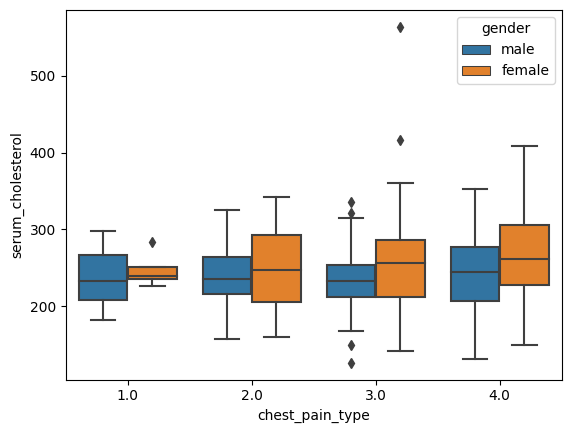

In [32]:
#We can also group the above box plots according to gender
#recall "hue" in barplot
sns.boxplot(x="chest_pain_type",y="serum_cholesterol",hue="gender",data=df)

In [ ]:
#[R] Discuss the observations made from the previous box plot.

We see that most outliers lie in the male chest pain type 3 and female chest pain type 3 in the data. We also see that there is little to no variation in female chest pain type 1, compared to others. Also in general the variability is more in females compared to men.

**Q2 Part 18**

In [ ]:
#[R] Use violinplot to plot the relationship between chest_pain_type and serum_cholesterol and discuss the observations.
#[R] Can you group the violinplots based on gender information? If so, prepare the corresponding plots and discuss the observations.

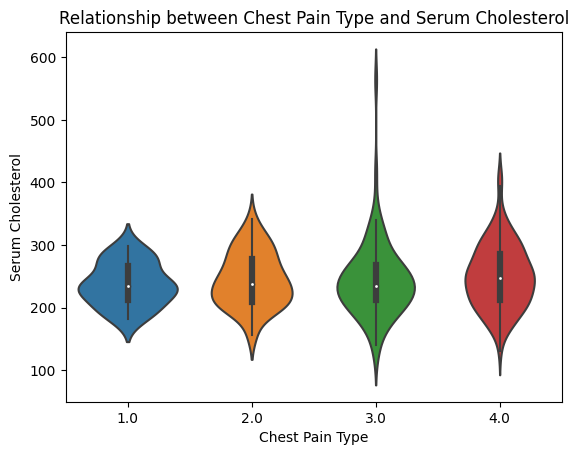

In [33]:
sns.violinplot(x='chest_pain_type', y='serum_cholesterol', data=df)
plt.title('Relationship between Chest Pain Type and Serum Cholesterol')
plt.xlabel('Chest Pain Type')
plt.ylabel('Serum Cholesterol')
plt.show()

Kernel Density Estimation (KDE):

The main body of a violin plot is a KDE, which shows the probability density of the data at different values. It represents the distribution of the numeric variable for each category of the categorical variable. The wider sections of the violin indicate higher density, while narrower parts indicate lower density.

Boxplot Elements:

Inside the violin, a small box plot is included. It showcases the median, quartiles, and possibly outliers. The thick line within the box represents the median, and the box's vertical extent indicates the interquartile range (IQR).

Width and Shape Variation:

The width of the violin depicts the density or frequency of the data at various values. Wider sections signify more data points, while narrower areas indicate fewer observations. The shape of the violin gives an overview of the data distribution within each category.

Outliers and Extremes:

Outliers, if present, are displayed as points or sections outside the main body of the violin. These might signify extreme values or patterns differing significantly from the general distribution within a specific category.


We again see that type 3 and 4 have more outliers as height of violin in more in both of them. Whereas as type 1 are denser.

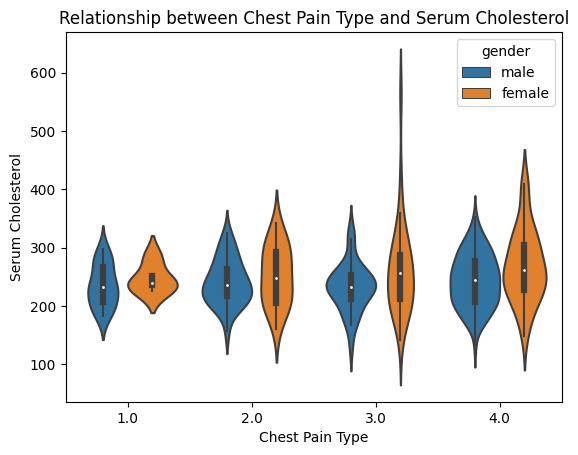

In [ ]:
sns.violinplot(x='chest_pain_type', y='serum_cholesterol', hue='gender', data=df)
plt.title('Relationship between Chest Pain Type and Serum Cholesterol')
plt.xlabel('Chest Pain Type')
plt.ylabel('Serum Cholesterol')
plt.show()

We see that female chestpain type 3 has highest ouliers and variabilty compared to all. Whereas the female chest pain type 1 is the densest among all with low variability. Male has lower variabilty compared to female plots and are denser.